In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium import Choropleth, CircleMarker
from folium.plugins import MarkerCluster
from scipy.stats import zscore
import seaborn as sns
from IPython.display import display
import webbrowser
from sklearn.cluster import KMeans

In [3]:
file = 'Hyderabad.csv'
df = pd.read_csv('Hyderabad.csv')

In [4]:
summary_stats = df.describe()
print(summary_stats)

missing_values = df.isnull().sum()
print(missing_values)

data_types = df.dtypes
print(data_types)

             w_no      w_area     bu_2000     bu_2022   buchg_abs   buchg_per  \
count  150.000000  151.000000  151.000000  151.000000  151.000000  150.000000   
mean    75.500000    8.080530    3.886556    5.631987    1.744901   13.075867   
std     43.445368   49.589855   23.749002   34.472527   10.795065   15.914729   
min      1.000000    0.650000    0.640000    0.650000    0.000000    0.000000   
25%     38.250000    1.535000    1.300000    1.360000    0.010000    0.817500   
50%     75.500000    2.370000    1.640000    1.910000    0.130000    6.280000   
75%    112.750000    4.505000    2.325000    3.170000    0.805000   22.692500   
max    150.000000  610.100000  293.450000  425.210000  131.760000   73.170000   

        ndvi_2000   ndvi_2022  ndvichg_abs  ndvichg_per  ...     TS_2000  \
count  151.000000  151.000000   151.000000   151.000000  ...  150.000000   
mean     0.817881    0.450662    -0.872649    -3.887881  ...   26.566565   
std      5.045543    2.816777     5.543742

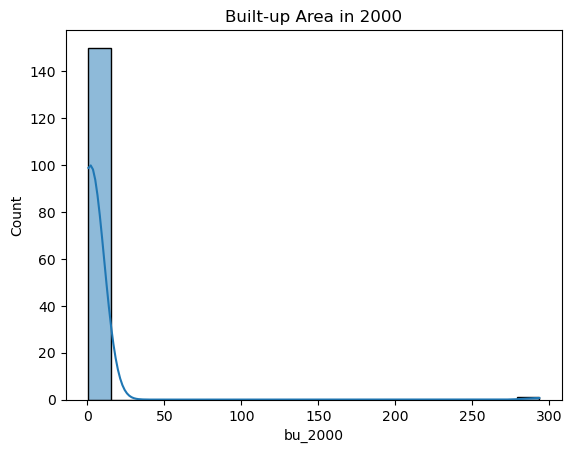

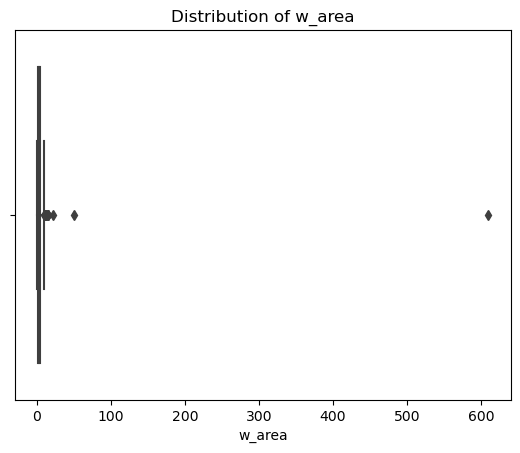

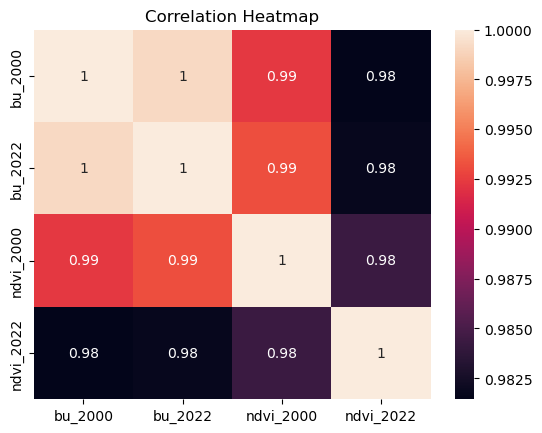

In [5]:
# Univariate Analysis
sns.histplot(df['bu_2000'], bins=20, kde=True)
plt.title('Built-up Area in 2000')
plt.show()

sns.boxplot(x='w_area', data=df)
plt.title('Distribution of w_area')
plt.show()

sns.heatmap(df[['bu_2000', 'bu_2022', 'ndvi_2000', 'ndvi_2022']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


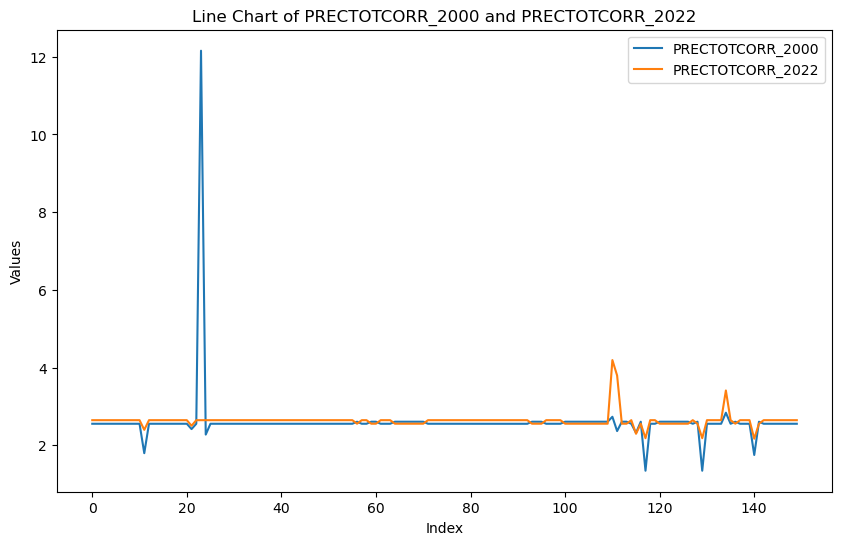

In [6]:
df[['PRECTOTCORR_2000', 'PRECTOTCORR_2022']].plot(kind='line', figsize=(10, 6))
plt.title('Line Chart of PRECTOTCORR_2000 and PRECTOTCORR_2022')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(['PRECTOTCORR_2000', 'PRECTOTCORR_2022'])
plt.show()

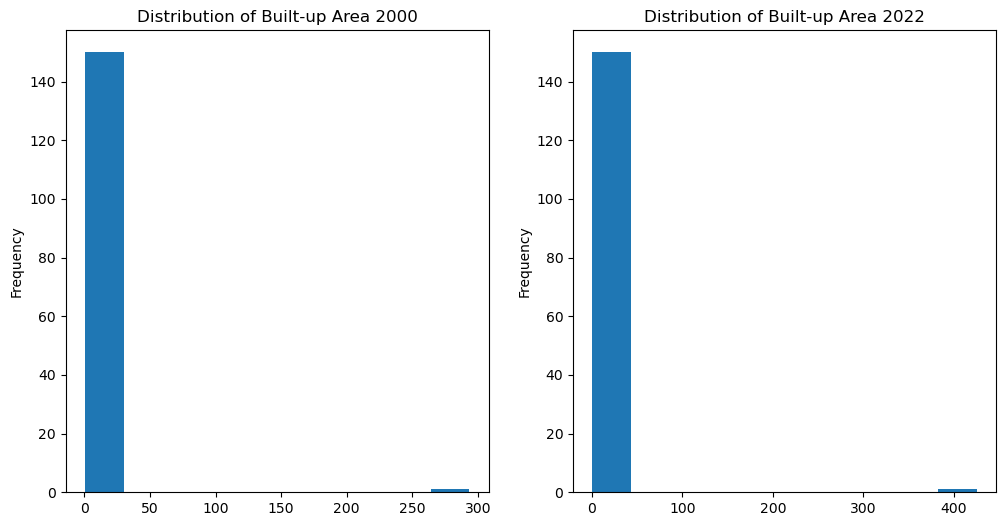

In [7]:
#Distribution of Builtup Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['bu_2000'].plot(kind='hist', title='Distribution of Built-up Area 2000')
plt.subplot(1, 2, 2)
df['bu_2022'].plot(kind='hist', title='Distribution of Built-up Area 2022')
plt.show()

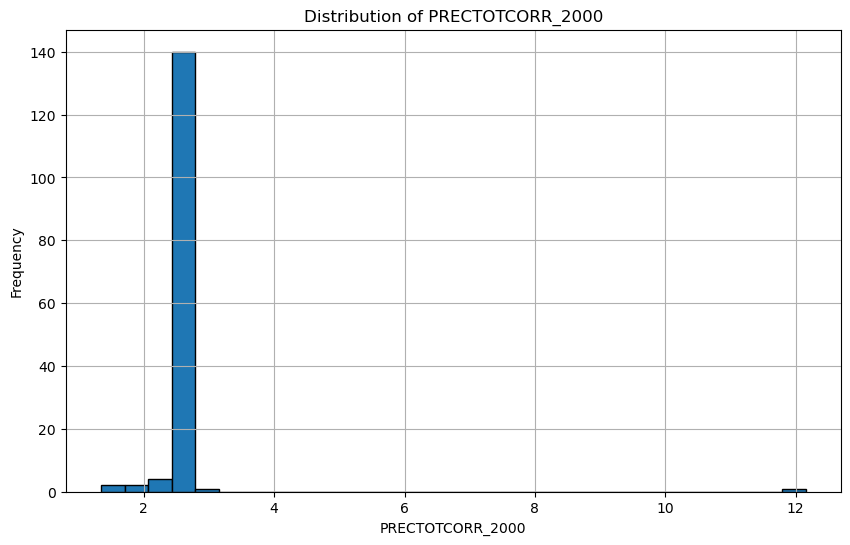

In [8]:
column_to_plot = 'PRECTOTCORR_2000'

# Plot the distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_plot], bins=30, edgecolor='black')
plt.title(f'Distribution of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

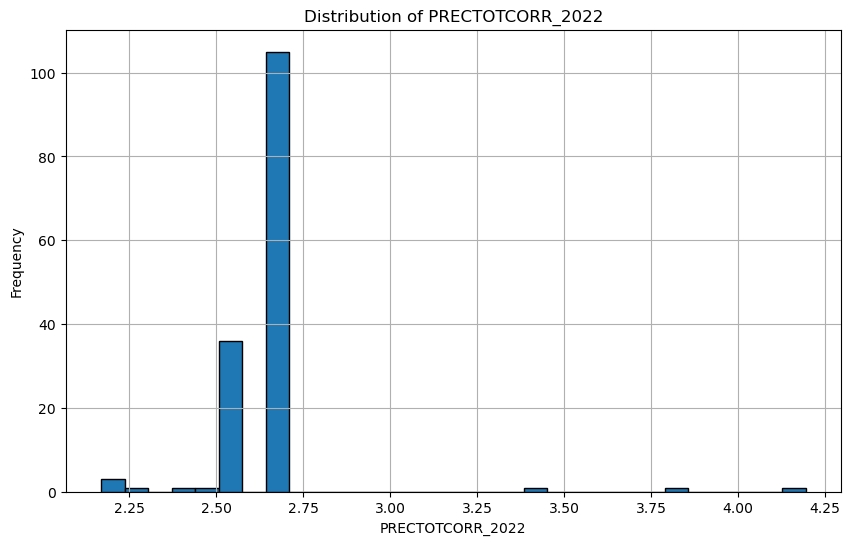

In [9]:
column_to_plot = 'PRECTOTCORR_2022'

# Plot the distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_plot], bins=30, edgecolor='black')
plt.title(f'Distribution of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
# Assuming 'buchg_abs' and 'PRECTOTCORR_2000' are column names in your DataFrame
columns_of_interest = ['buchg_abs', 'PRECTOTCORR_2000']

# Select the columns of interest from the DataFrame
selected_columns = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

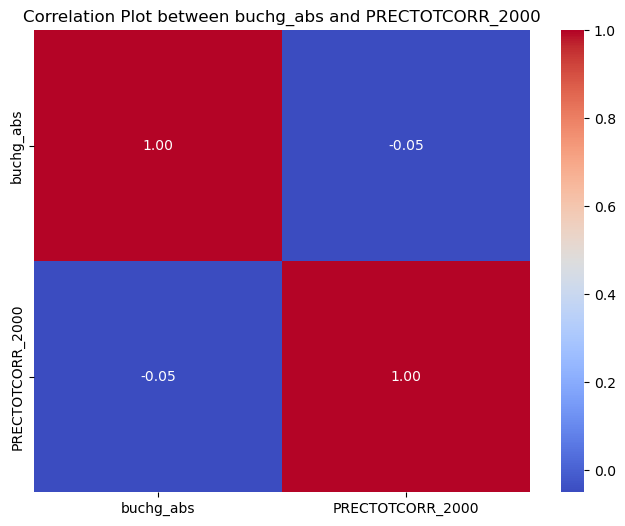

In [11]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot between buchg_abs and PRECTOTCORR_2000')
plt.show()

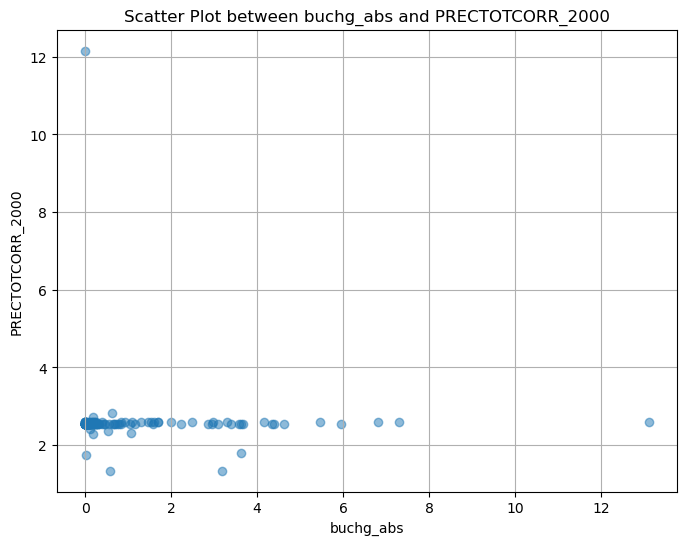

In [12]:
x_column = 'buchg_abs'
y_column = 'PRECTOTCORR_2000'
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'Scatter Plot between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

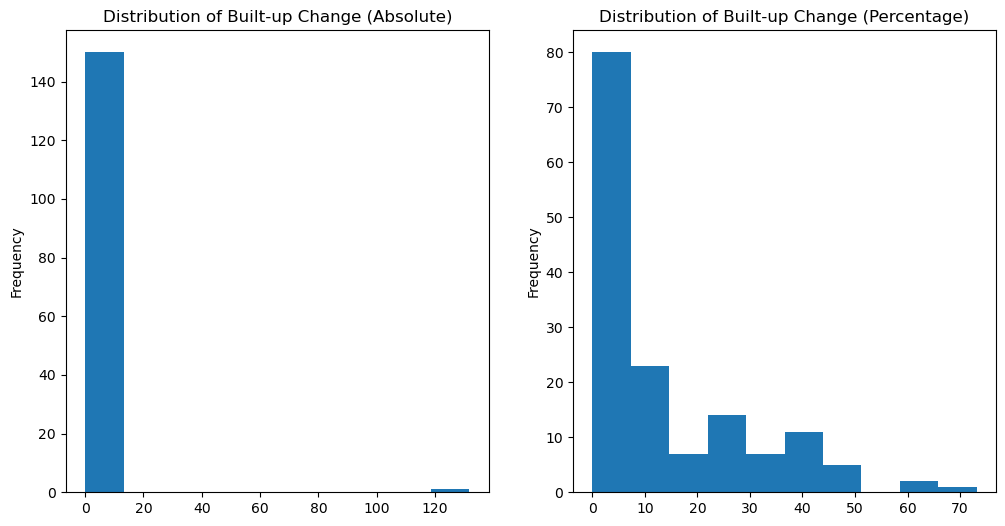

In [13]:
#Builtup Area Change
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['buchg_abs'].plot(kind='hist', title='Distribution of Built-up Change (Absolute)')
plt.subplot(1, 2, 2)
df['buchg_per'].plot(kind='hist', title='Distribution of Built-up Change (Percentage)')
plt.show()

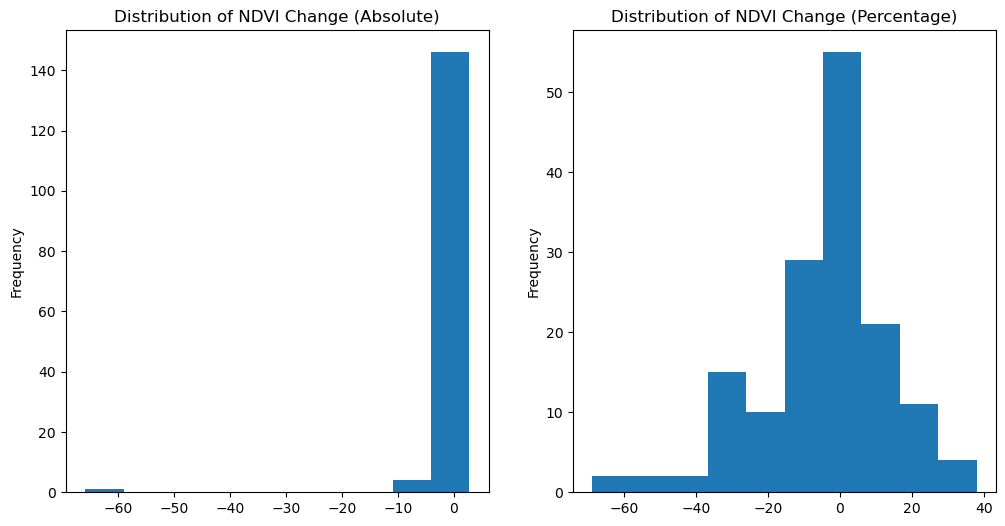

In [14]:
#NDVI change
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['ndvichg_abs'].plot(kind='hist', title='Distribution of NDVI Change (Absolute)')
plt.subplot(1, 2, 2)
df['ndvichg_per'].plot(kind='hist', title='Distribution of NDVI Change (Percentage)')
plt.show()

In [15]:
# ELevation and Slope
elevation_stats = df[['elv-min', 'elv_max', 'elv_rng', 'elv_mean']].describe()
slope_stats = df[['slp_min', 'slp_max', 'slp_rng', 'slp_mean']].describe()

print("Elevation Statistics:")
print(elevation_stats)
print("\nSlope Statistics:")
print(slope_stats)

Elevation Statistics:
          elv-min     elv_max     elv_rng    elv_mean
count  150.000000  150.000000  150.000000  150.000000
mean   512.173333  556.606667   44.433333  531.338933
std     25.528441   35.686724   20.110239   28.781587
min    456.000000  497.000000   13.000000  479.710000
25%    492.000000  525.250000   29.250000  509.025000
50%    510.000000  555.000000   41.000000  526.595000
75%    530.500000  582.250000   53.750000  552.935000
max    569.000000  637.000000  117.000000  595.710000

Slope Statistics:
       slp_min     slp_max     slp_rng    slp_mean
count    150.0  150.000000  150.000000  150.000000
mean       0.0   13.118800   13.118800    2.681200
std        0.0    5.725265    5.725265    0.609758
min        0.0    4.950000    4.950000    1.780000
25%        0.0    8.842500    8.842500    2.320000
50%        0.0   11.725000   11.725000    2.535000
75%        0.0   15.365000   15.365000    2.827500
max        0.0   38.630000   38.630000    5.410000


In [16]:
#Geographical Distribution
# Assuming 'Latitude' and 'Longitude' columns may contain NaN values
df_clean = df.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(location=[df_clean['Latitude'].mean(), df_clean['Longitude'].mean()], zoom_start=10)

heat_data = [[row['Latitude'], row['Longitude'], row['bu_2022'] - row['bu_2000']] for _, row in df_clean.iterrows()]
HeatMap(heat_data, name='Built-up Area Change (2000-2022)', gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}).add_to(m)

# Save the map as an HTML file
m.save("folium_heatmap.html")

# Open the HTML file in the default web browser
webbrowser.open("folium_heatmap.html")

True

In [17]:
#Correlation Analysis
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_clean[numeric_columns]

correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                      w_no    w_area   bu_2000   bu_2022  buchg_abs  \
w_no              1.000000  0.067654  0.132688  0.074047   0.023988   
w_area            0.067654  1.000000  0.847460  0.939076   0.851087   
bu_2000           0.132688  0.847460  1.000000  0.851081   0.620164   
bu_2022           0.074047  0.939076  0.851081  1.000000   0.939683   
buchg_abs         0.023988  0.851087  0.620164  0.939683   1.000000   
buchg_per        -0.020828  0.421674  0.307210  0.629134   0.740055   
ndvi_2000        -0.063059  0.675431  0.608150  0.611519   0.517767   
ndvi_2022         0.004067  0.605201  0.577957  0.487341   0.351790   
ndvichg_abs      -0.055858 -0.652487 -0.417945 -0.788671  -0.905981   
ndvichg_per      -0.060810 -0.303803 -0.206724 -0.508137  -0.624453   
slp_min                NaN       NaN       NaN       NaN        NaN   
slp_max           0.157936  0.299486  0.405965  0.296294   0.178053   
slp_rng           0.157936  0.299486  0.405965  0.296294   0.178053   
slp_me

In [18]:
# Demograohic Analysis
demographic_stats = df[['tot_p', 'tot_m', 'tot_f']].describe()
print(demographic_stats)

              tot_p         tot_m         tot_f
count    150.000000    150.000000    150.000000
mean   44878.600000  22951.306667  21927.293333
std    15560.509407   8040.452905   7535.401994
min    17601.000000   9222.000000   8379.000000
25%    32054.750000  16391.000000  15877.500000
50%    41954.000000  21357.000000  20549.500000
75%    54941.500000  28367.250000  26590.750000
max    93141.000000  48202.000000  44939.000000


In [19]:
#Meteorological Features
meteorological_stats_2000 = df[['TS_2000', 'QV2M_2000', 'PRECTOTCORR_2000', 'WS10M_MAX_2000', 'WS50M_MAX_2000']].describe()
meteorological_stats_2022 = df[['TS_2022', 'QV2M_2022', 'PRECTOTCORR_2022', 'WS10M_MAX_2022', 'WS50M_MAX_2022']].describe()

print("Meteorological Statistics for 2000:")
print(meteorological_stats_2000)
print("\nMeteorological Statistics for 2022:")
print(meteorological_stats_2022)

Meteorological Statistics for 2000:
          TS_2000   QV2M_2000  PRECTOTCORR_2000  WS10M_MAX_2000  \
count  150.000000  150.000000        150.000000      150.000000   
mean    26.566565   11.935192          2.601851        5.444056   
std      0.348783    1.109736          0.804213        0.132333   
min     24.285400    2.554200          1.345600        4.613300   
25%     26.449100   11.637200          2.554200        5.453200   
50%     26.576400   12.154600          2.554200        5.453200   
75%     26.576500   12.154600          2.606775        5.486975   
max     28.398000   16.530400         12.154600        6.107200   

       WS50M_MAX_2000  
count      150.000000  
mean         7.487208  
std          0.135851  
min          6.841100  
25%          7.468600  
50%          7.468600  
75%          7.571225  
max          8.205200  

Meteorological Statistics for 2022:
          TS_2022   QV2M_2022  PRECTOTCORR_2022  WS10M_MAX_2022  \
count  150.000000  150.000000        150

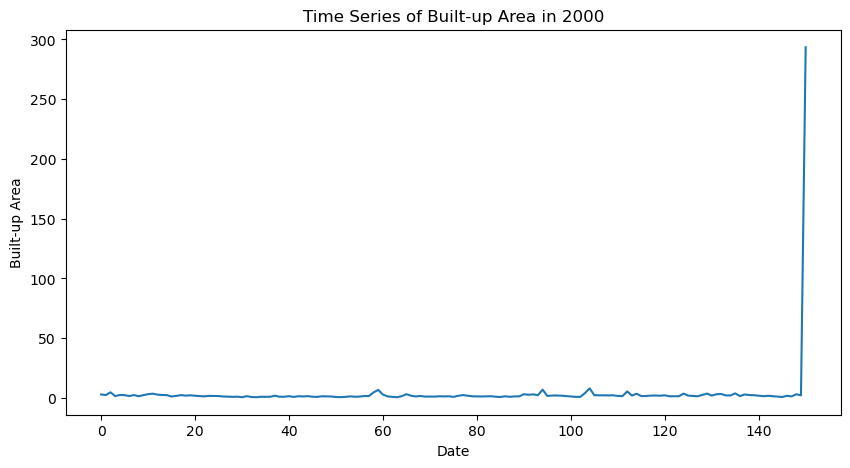

In [20]:
# Time Series Analysis

# Example: Plot time series of Built-up Area for 2000
plt.figure(figsize=(10, 5))
df['bu_2000'].plot(title='Time Series of Built-up Area in 2000')
plt.xlabel('Date')
plt.ylabel('Built-up Area')
plt.show()

In [21]:
#Outlier Detection
# Using z-score for outlier detection (replace 'feature_column' with the actual column name)
from scipy.stats import zscore

z_scores = zscore(df['bu_2000'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = df.index[outliers]

# Print or handle the outlier indices as needed
print("Outlier Indices:", outlier_indices)

Outlier Indices: Int64Index([150], dtype='int64')


C:\Users\Gauth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gauth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


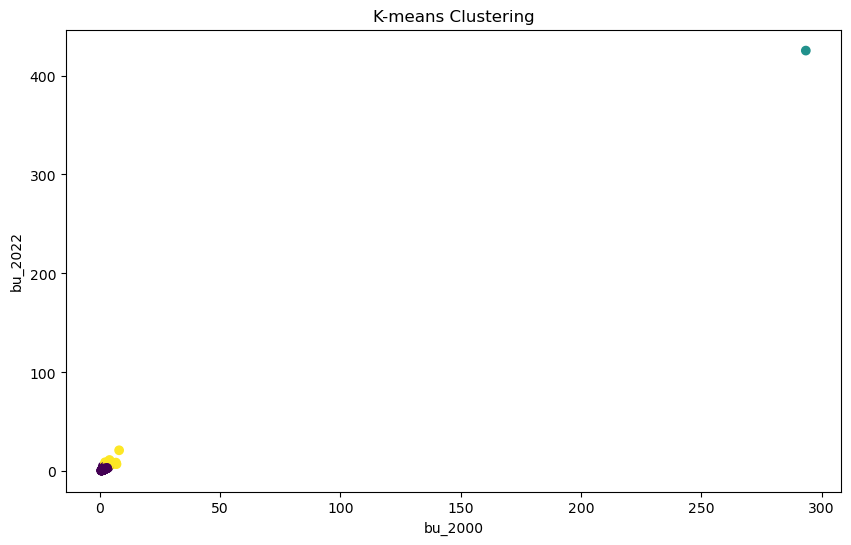

In [22]:
#K-means Clustering

X = df[['bu_2000', 'bu_2022']]  # Use relevant features for clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['bu_2000'], df['bu_2022'], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('bu_2000')
plt.ylabel('bu_2022')
plt.show()

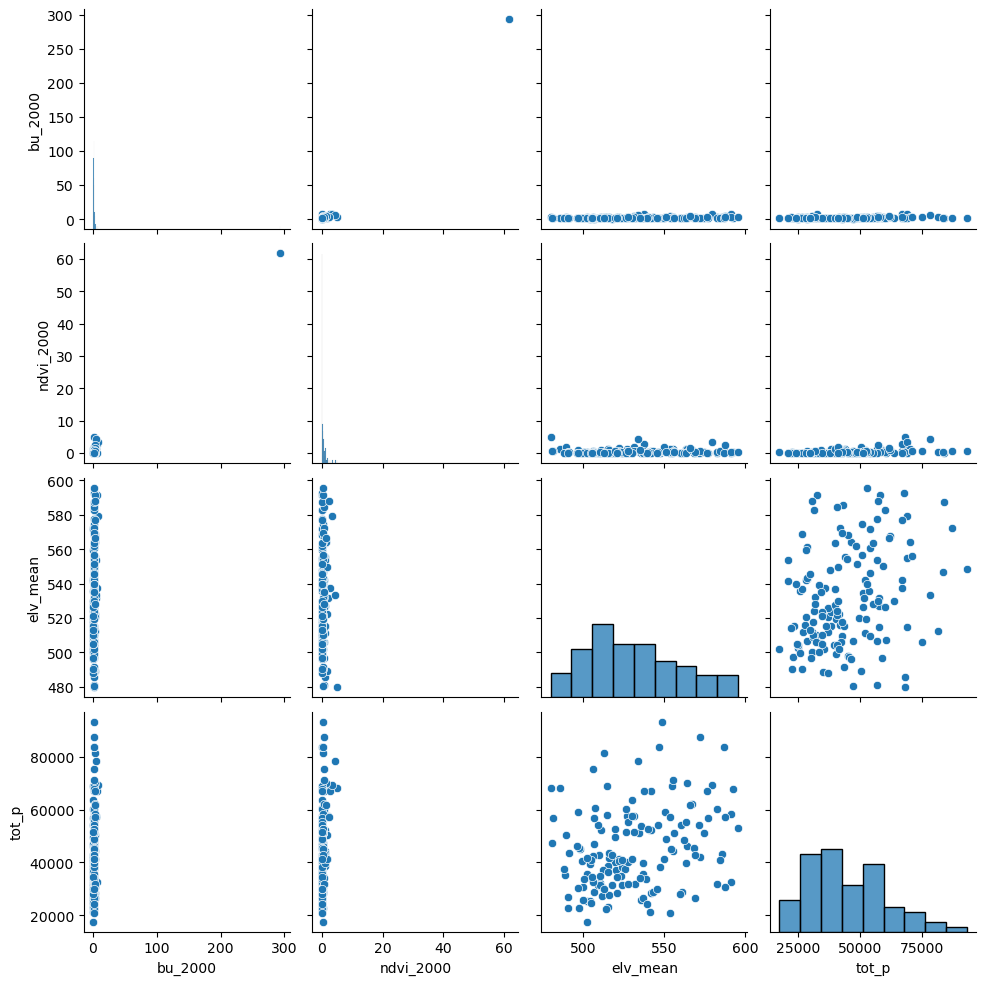

In [23]:
#Feature Engineering
# Example: Create a density feature based on built-up area and area size
df['bu_density'] = df['bu_2000'] / df['w_area']

# Example: Create a ratio feature between total population and built-up area
df['pop_bu_ratio'] = df['tot_p'] / df['bu_2000']

# Visualization
selected_features = ['bu_2000', 'ndvi_2000', 'elv_mean', 'tot_p']
sns.pairplot(df[selected_features])
plt.show()